# Diabetes Prediction

Dataset : http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Diabetes.html 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv('DiabetesRegistry.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'DiabetesRegistry.csv'

In [ ]:
df.shape

In [ ]:
df.head()

**Filling missing blood pressure data and averageing the blood pressure values**

In [ ]:
df['bp.2s'].fillna(df['bp.1s'],inplace=True)
df['bp.2d'].fillna(df['bp.1d'],inplace=True)

In [ ]:
systolicBP = (df['bp.1s']+df['bp.2s'])//2
diastolicBP = (df['bp.1d']+df['bp.2d'])//2

**Calculating BMI**

In [ ]:
weight = (df['Weight 1']+df['Weight 2'])/2
weightKG = weight *  0.45359237
heightMeter = df['Height']*0.0254
BMI = weightKG/(heightMeter**2)

**Adding blood pressure and BMI columns to our Data Frame**

In [ ]:
BP = pd.concat([systolicBP,diastolicBP,BMI],axis='columns',keys=['systolicBP','diastolicBP','BMI'])
df = pd.concat([df,BP],axis='columns')
df.drop(['bp.1s','bp.2s','bp.1d','bp.2d','Height','Weight 1','Weight 2'],axis='columns',inplace=True)

**Calculating Waist to Hip ratio**

In [3]:
W2Hratio = np.array(df['waist'])/np.array(df['hip'])
W2Hratio = pd.DataFrame(W2Hratio,columns=['W/H_ratio'])
df = pd.concat([df,W2Hratio],axis='columns')
df.drop(['waist','hip'],axis = 'columns',inplace=True)

NameError: name 'df' is not defined

In [4]:
df.head()

NameError: name 'df' is not defined

**Using One Hot encoding for Gender column**

In [5]:
G = pd.get_dummies(df['Gender'])
df = pd.concat([df,G],axis='columns')
df.drop(['Gender','male'],axis='columns',inplace=True)

NameError: name 'df' is not defined

**Label encoding for frame column**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['frame'])
df['frame'] = le.transform(df['frame'])

NameError: name 'df' is not defined

**Removing entries with empty data values**

In [7]:
df.dropna(axis=0,inplace=True)

NameError: name 'df' is not defined

In [8]:
df.shape

NameError: name 'df' is not defined

In [9]:
df.head(5)

NameError: name 'df' is not defined

**Visualising Data***

In [10]:
correlation_matrix = df.corr().round(3)
plt.figure(figsize = (15,15))
dataplot = sn.heatmap(correlation_matrix, cmap="YlGnBu", annot=True,square = True)
plt.show()

NameError: name 'df' is not defined

In [11]:
diaSet = df[df['glyhb']>=6.5]
NodiaSet = df[df['glyhb']<6.5]

NameError: name 'df' is not defined

In [12]:
plt.scatter(NodiaSet['stab.glu'],NodiaSet['ratio'],color='green',label = "Diabetes Negetive")
plt.scatter(diaSet['stab.glu'],diaSet['ratio'],color='red',label="Diabetes Positive")
plt.xlabel('Stabilized Glucose')
plt.ylabel('Cholesterol Ratio')
plt.legend()
plt.show()

NameError: name 'NodiaSet' is not defined

In [13]:
plt.scatter(NodiaSet['stab.glu'],NodiaSet['BMI'],color='green',label = "Diabetes Negetive")
plt.scatter(diaSet['stab.glu'],diaSet['BMI'],color='red',label="Diabetes Positive")
plt.xlabel('Stabilized Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

NameError: name 'NodiaSet' is not defined

In [14]:
features = ['ratio','Age','systolicBP','diastolicBP','BMI','W/H_ratio','stab.glu','frame','female']

**Normalising the deseried features**

In [23]:
dfNormal = df
for col in features:
    dfNormal[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    

In [24]:
dfNormal.head()

,id,chol,stab.glu,hdl,ratio,glyhb,Location,Age,frame,time.ppn,systolicBP,diastolicBP,BMI,W/H_ratio,female
0,1000,203.0,0.100890,56.0,0.117978,4.31,Buckingham,0.369863,0.333333,720.0,0.17500,0.144737,0.151388,0.176427,1.0
1,1001,165.0,0.145401,24.0,0.303371,4.44,Buckingham,0.136986,0.000000,360.0,0.13750,0.263158,0.545386,0.599765,1.0
2,1002,228.0,0.130564,37.0,0.264045,4.64,Buckingham,0.534247,0.000000,180.0,0.60625,0.578947,0.792995,0.385718,1.0
3,1003,78.0,0.133531,12.0,0.280899,4.63,Buckingham,0.657534,0.000000,480.0,0.12500,0.026316,0.071076,0.404744,0.0
4,1005,249.0,0.124629,28.0,0.415730,7.72,Buckingham,0.616438,0.333333,300.0,0.30000,0.421053,0.293303,0.848849,0.0


In [25]:
meanRatio = dfNormal['ratio'].mean()
meanAge = dfNormal['Age'].mean()
meansystolicBP = dfNormal['systolicBP'].mean()
meandiastolicBP = dfNormal['diastolicBP'].mean()
meanglu = dfNormal['stab.glu'].mean()
meanBMI = dfNormal['BMI'].mean()
sdRatio = dfNormal['ratio'].std()
sdAge = dfNormal['Age'].std()
sdsystolicBP = dfNormal['systolicBP'].std()
sddiastolicBP = dfNormal['diastolicBP'].std()
sdBMI = dfNormal['BMI'].std()
sdglu = dfNormal['stab.glu'].std()
dfNormal.head()

,id,chol,stab.glu,hdl,ratio,glyhb,Location,Age,frame,time.ppn,systolicBP,diastolicBP,BMI,W/H_ratio,female
0,1000,203.0,0.100890,56.0,0.117978,4.31,Buckingham,0.369863,0.333333,720.0,0.17500,0.144737,0.151388,0.176427,1.0
1,1001,165.0,0.145401,24.0,0.303371,4.44,Buckingham,0.136986,0.000000,360.0,0.13750,0.263158,0.545386,0.599765,1.0
2,1002,228.0,0.130564,37.0,0.264045,4.64,Buckingham,0.534247,0.000000,180.0,0.60625,0.578947,0.792995,0.385718,1.0
3,1003,78.0,0.133531,12.0,0.280899,4.63,Buckingham,0.657534,0.000000,480.0,0.12500,0.026316,0.071076,0.404744,0.0
4,1005,249.0,0.124629,28.0,0.415730,7.72,Buckingham,0.616438,0.333333,300.0,0.30000,0.421053,0.293303,0.848849,0.0


**Removing outliers**

In [26]:
z = 2.97
dfno_outlier = dfNormal[
    (dfNormal.ratio>meanRatio-z*sdRatio) & (dfNormal.ratio<meanRatio+z*sdRatio) &
    (dfNormal.Age>meanAge-z*sdAge) & (dfNormal.Age<meanAge+z*sdAge) &
    (dfNormal.systolicBP>meansystolicBP-z*sdsystolicBP) & (dfNormal.systolicBP<meansystolicBP+z*sdsystolicBP) &
    (dfNormal.diastolicBP>meandiastolicBP-z*sddiastolicBP) & (dfNormal.diastolicBP<meandiastolicBP+z*sddiastolicBP) &
    (dfNormal.BMI>meanBMI-z*sdBMI) & (dfNormal.BMI<meanBMI+z*sdBMI)
]

In [27]:
df_class0 = dfno_outlier[dfno_outlier['glyhb']<7]
df_class1 = dfno_outlier[dfno_outlier['glyhb']>=7]

In [28]:
count_class0 = df_class0.shape[0]
count_class1 = df_class1.shape[0]

In [29]:
print('Diabetes Negetive:',count_class0)
print('Diabetes Positive:',count_class1)

Diabetes Negetive: 308
Diabetes Positive: 57


*Our Dataset is unbalanced against the diabetes positive class. We will address it later*

In [30]:
X = dfno_outlier[features]
X.head()

,ratio,Age,systolicBP,diastolicBP,BMI,W/H_ratio,stab.glu,frame,female
0,0.117978,0.369863,0.17500,0.144737,0.151388,0.176427,0.100890,0.333333,1.0
1,0.303371,0.136986,0.13750,0.263158,0.545386,0.599765,0.145401,0.000000,1.0
2,0.264045,0.534247,0.60625,0.578947,0.792995,0.385718,0.130564,0.000000,1.0
3,0.280899,0.657534,0.12500,0.026316,0.071076,0.404744,0.133531,0.000000,0.0
4,0.415730,0.616438,0.30000,0.421053,0.293303,0.848849,0.124629,0.333333,0.0


In [31]:
X.shape

(365, 9)

**Considering Glycosolated Hemoglobin level > 6.5 to be indicator of diabetes positive subject**

In [32]:
y = dfno_outlier['glyhb']>=6.5
y.replace({False:0,True:1},inplace=True)

In [102]:
y2 = dfno_outlier['glyhb']
y2.head()

0    4.31
1    4.44
2    4.64
3    4.63
4    7.72
Name: glyhb, dtype: float64

**Spliting Data into training and testing phases**

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15, stratify=y)

In [62]:
X_train.shape

(255, 9)

In [63]:
X_test.shape

(110, 9)

In [64]:
y_train.value_counts()

0    212
1     43
Name: glyhb, dtype: int64

**Using SMOTE to oversample diabetes positive class in training data**

In [65]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X_train,y_train)
y_sm.value_counts()

0    212
1    212
Name: glyhb, dtype: int64

In [66]:
y_sm.value_counts()

0    212
1    212
Name: glyhb, dtype: int64

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score as cvs

In [68]:
def printScore(model,X_test,y_test):
    y_predicted = model.predict(X_test)
    print(classification_report(y_test,y_predicted))
    cm = confusion_matrix(y_predicted,y_test)
    plt.figure(figsize = (5,4))
    sn.heatmap(cm,annot = True,fmt='d')
    plt.xlabel('Truth')
    plt.ylabel('Predicted')

### Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
score = cvs(modelLR,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.8849315068493151


              precision    recall  f1-score   support

           0       0.98      0.91      0.94        91
           1       0.68      0.89      0.77        19

    accuracy                           0.91       110
   macro avg       0.83      0.90      0.86       110
weighted avg       0.93      0.91      0.91       110



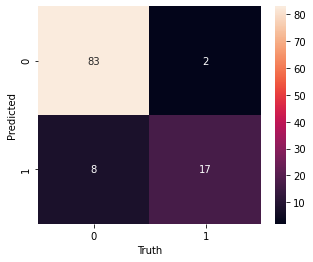

In [70]:
modelLR.fit(X_sm,y_sm)
printScore(modelLR,X_test,y_test)

### Decision Tree Classifier

In [71]:
from sklearn import tree
modelTree = tree.DecisionTreeClassifier()
score = cvs(modelTree,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.8520547945205479


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        91
           1       0.62      0.79      0.70        19

    accuracy                           0.88       110
   macro avg       0.79      0.85      0.81       110
weighted avg       0.90      0.88      0.89       110



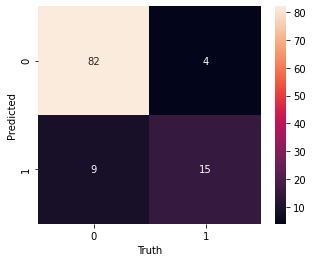

In [72]:
modelTree.fit(X_sm,y_sm)
printScore(modelTree,X_test,y_test)

### Support Vector Classification

#### Linear kernel

In [73]:
from sklearn.svm import SVC
modelSVClinear = SVC(C=5,kernel='linear')
score = cvs(modelSVClinear,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.9178082191780822


              precision    recall  f1-score   support

           0       0.98      0.91      0.94        91
           1       0.68      0.89      0.77        19

    accuracy                           0.91       110
   macro avg       0.83      0.90      0.86       110
weighted avg       0.93      0.91      0.91       110



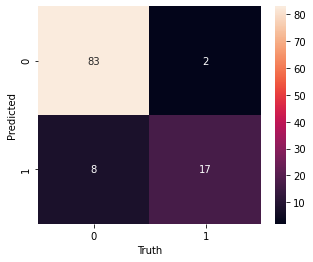

In [74]:
modelSVClinear.fit(X_sm,y_sm)
printScore(modelSVClinear,X_test,y_test)

#### Polynomial Kernel

In [75]:
modelSVCpoly = SVC(C=50,kernel = 'poly')
score = cvs(modelSVCpoly,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.8493150684931507


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        91
           1       0.62      0.79      0.70        19

    accuracy                           0.88       110
   macro avg       0.79      0.85      0.81       110
weighted avg       0.90      0.88      0.89       110



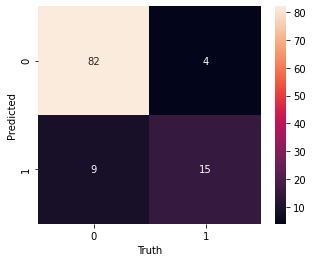

In [76]:
modelSVCpoly.fit(X_sm,y_sm)
printScore(modelSVCpoly,X_test,y_test)

#### RBF kernel

In [77]:
modelSVCrbf = SVC(C=10,kernel = 'rbf')
score = cvs(modelSVCrbf,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.9013698630136986


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        91
           1       0.68      0.79      0.73        19

    accuracy                           0.90       110
   macro avg       0.82      0.86      0.84       110
weighted avg       0.91      0.90      0.90       110



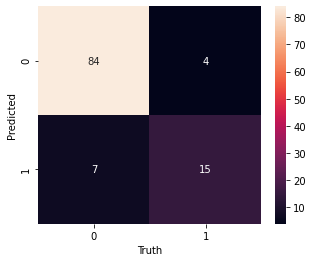

In [78]:
modelSVCrbf.fit(X_sm,y_sm)
printScore(modelSVCrbf,X_test,y_test)

#### Sigmoid kernel

In [79]:
modelSVCsigmoid = SVC(C=0.5,kernel = 'sigmoid')
score = cvs(modelSVCsigmoid,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.8


              precision    recall  f1-score   support

           0       0.77      0.41      0.53        91
           1       0.13      0.42      0.20        19

    accuracy                           0.41       110
   macro avg       0.45      0.41      0.36       110
weighted avg       0.66      0.41      0.47       110



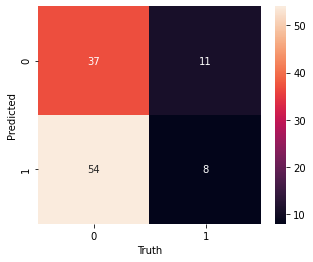

In [80]:
modelSVCsigmoid.fit(X_sm,y_sm)
printScore(modelSVCsigmoid,X_test,y_test)

### Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators = 200,criterion='gini')
score = cvs(modelRF,X,y,cv=5)
print('accuracy:',np.mean(score))

accuracy: 0.9178082191780821


              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.83      0.79      0.81        19

    accuracy                           0.94       110
   macro avg       0.89      0.88      0.89       110
weighted avg       0.94      0.94      0.94       110



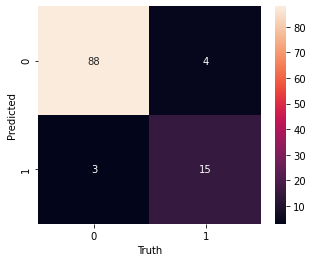

In [99]:
modelRF.fit(X_sm,y_sm)
printScore(modelRF,X_test,y_test)

In [118]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
score = cvs(modelGNB,X,y,cv=10)
print(np.mean(score))

0.9125375375375375


              precision    recall  f1-score   support

           0       0.97      0.86      0.91        91
           1       0.57      0.89      0.69        19

    accuracy                           0.86       110
   macro avg       0.77      0.88      0.80       110
weighted avg       0.90      0.86      0.87       110



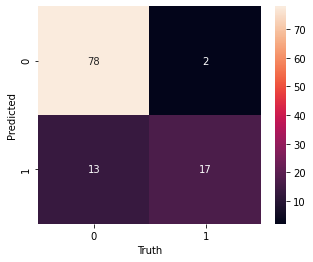

In [119]:
modelGNB.fit(X_sm,y_sm)
printScore(modelGNB,X_test,y_test)

### Artificial Neural Network Model

In [83]:
from tensorflow import keras 
import tensorflow as tf

In [108]:
modelNN = keras.Sequential([
    keras.layers.Dense(100,input_shape=(X.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])
modelNN.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
modelNN.fit(X_sm,y_sm,epochs=500)

Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5307
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6958
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7028
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7311
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7594
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7712
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7948
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8042
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.8208
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8208
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9646
Epoch 164/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9623
Epoch 165/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9623
Epoch 166/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9646
Epoch 167/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9693
Epoch 168/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9670
Epoch 169/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9599
Epoch 170/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9693
Epoch 171/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9623
Epoch 172/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9599
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9811
Epoch 323/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9882
Epoch 324/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9835
Epoch 325/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9835
Epoch 326/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9858
Epoch 327/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9835
Epoch 328/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9929
Epoch 329/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9882
Epoch 330/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9835
Epoch 331/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9882
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9953
Epoch 484/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9953
Epoch 485/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9976
Epoch 486/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9953
Epoch 487/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9953
Epoch 488/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 489/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9976
Epoch 490/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9953
Epoch 491/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9976
Epoch 492/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9976
Epoc

In [110]:
modelNN.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.9364


[0.5184148550033569, 0.9363636374473572]

In [111]:
y_p = modelNN.predict(X_test)

In [112]:
y_predicted = []
for yi in y_p:
    if yi>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        91
           1       0.88      0.74      0.80        19

    accuracy                           0.94       110
   macro avg       0.91      0.86      0.88       110
weighted avg       0.93      0.94      0.93       110



Text(24.0, 0.5, 'Predicted')

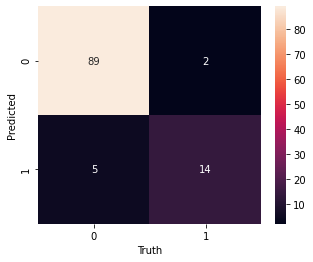

In [113]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
print(classification_report(y_test,y_predicted))
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')